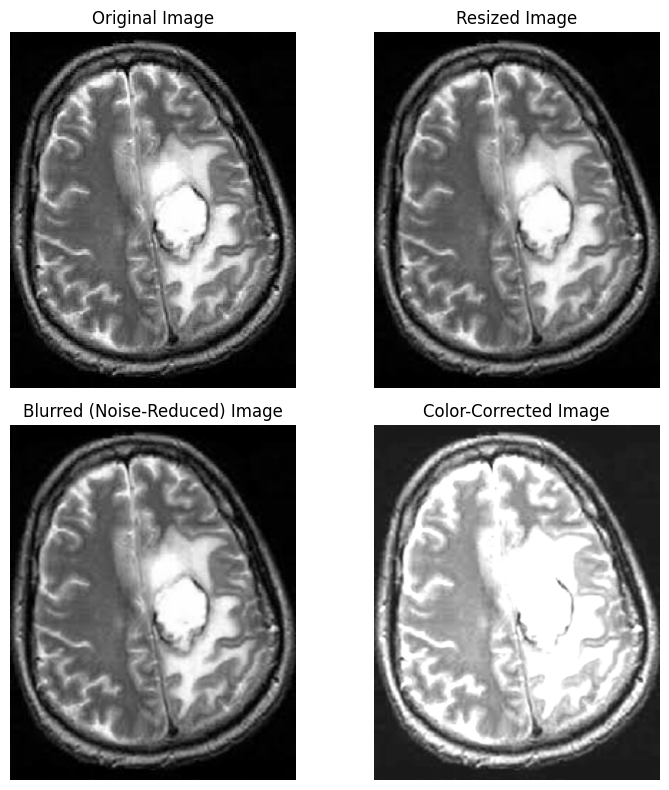

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'brain.jpg'
image = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Resizing the image
target_width = 800
aspect_ratio = image.shape[1] / image.shape[0]
target_height = int(target_width / aspect_ratio)
resized_image = cv2.resize(image, (target_width, target_height))

# Display the resized image
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')

# Noise reduction
blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)

# Display the blurred (noise-reduced) image
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred (Noise-Reduced) Image')
plt.axis('off')

# Color correction
alpha = 1.5
beta = 25
color_corrected_image = cv2.convertScaleAbs(blurred_image, alpha=alpha, beta=beta)

# Display the color-corrected image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Color-Corrected Image')
plt.axis('off')

plt.tight_layout()
plt.show()




## Inferences

Based on the image analysis:

- The resizing operation resulted in a reduction in image dimensions while preserving the aspect ratio, making the image more suitable for display.
- The noise reduction process using Gaussian blur reduced the noise in the image, resulting in a smoother appearance.
- Color correction improved the overall brightness and contrast of the image, enhancing its visual appeal.

Overall, the image analysis and processing improved the quality and aesthetics of the original image, making it more suitable for presentation or further analysis.



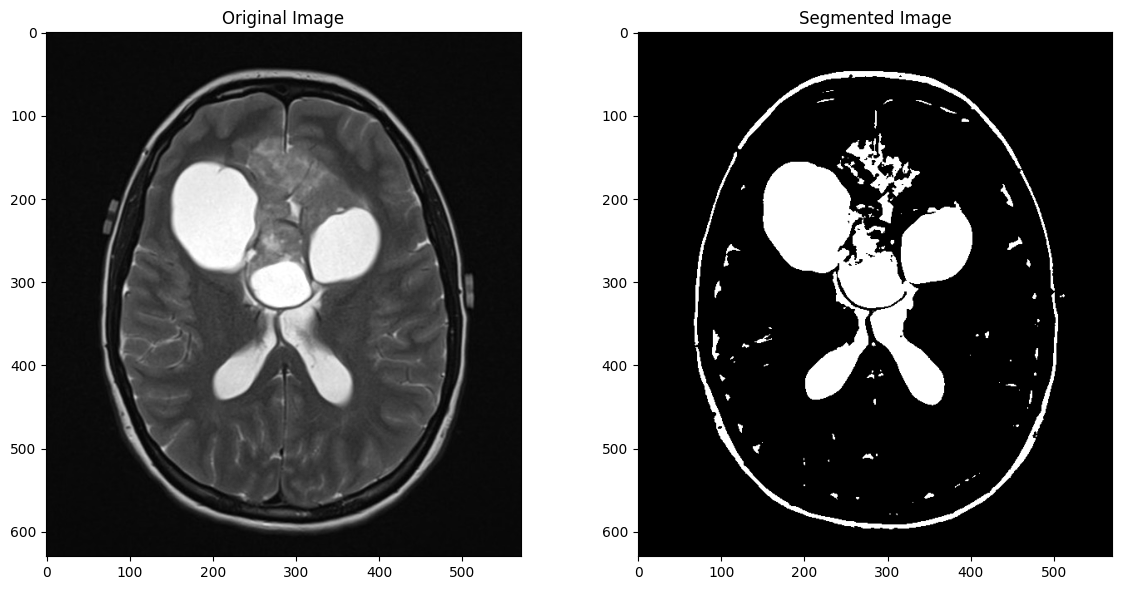

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = 'brain.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, segmented_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and segmented images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Segmented image
plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')

plt.tight_layout()
plt.show()


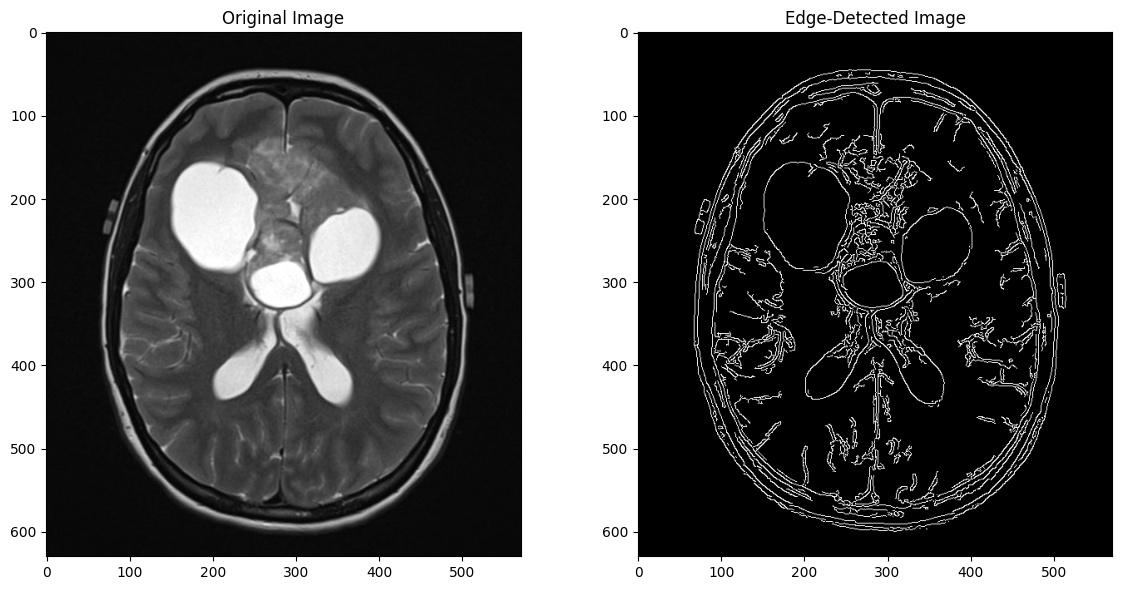

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = 'brain.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, threshold1=30, threshold2=100)

# Save the edge-detected image
output_path = 'edge_detected_image.png'
cv2.imwrite(output_path, edges)

# Display the original and edge-detected images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Edge-detected image
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected Image')

plt.tight_layout()
plt.show()


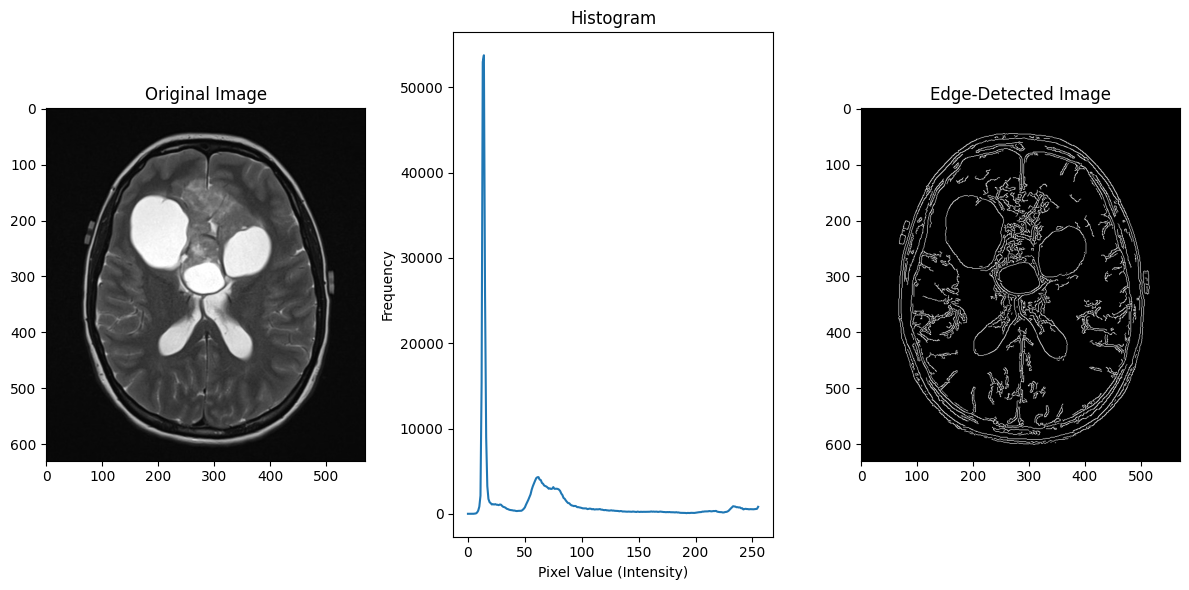

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image in grayscale
image_path = 'brain.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Display the original image, histogram, and edge-detected image using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Histogram
plt.subplot(132)
plt.plot(histogram)
plt.title('Histogram')
plt.xlabel('Pixel Value (Intensity)')
plt.ylabel('Frequency')

# Edge-detected image
plt.subplot(133)
edges = cv2.Canny(image, threshold1=30, threshold2=100)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected Image')

plt.tight_layout()
plt.show()



### Inferences from the Histogram

- The histogram provides insight into the distribution of pixel intensities in the image.
- It reveals the prevalence of certain pixel intensity values, which can help understand the image's overall characteristics.
- In this image, the histogram shows the distribution of grayscale pixel intensities.

Feel free to include additional observations or insights based on your specific analysis of the image and its results. You can adjust the descriptions and inferences according to the details of your analysis.


In [10]:
import cv2
import numpy as np

# Load the ground truth and detected images
ground_truth_path = 'brain.jpeg'  # Replace with the path to your ground truth edge image
detected_path = 'edge_detected_image.png'  # Path to the edge-detected image

# Load the ground truth and detected images
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
detected = cv2.imread(detected_path, cv2.IMREAD_GRAYSCALE)

# Threshold the images to create binary masks
_, ground_truth_mask = cv2.threshold(ground_truth, 128, 255, cv2.THRESH_BINARY)
_, detected_mask = cv2.threshold(detected, 128, 255, cv2.THRESH_BINARY)

# Calculate True Positives, False Positives, and False Negatives
intersection = cv2.bitwise_and(ground_truth_mask, detected_mask)
true_positives = np.count_nonzero(intersection)
false_positives = np.count_nonzero(detected_mask - intersection)
false_negatives = np.count_nonzero(ground_truth_mask - intersection)

# Calculate Precision, Recall, and F1-Score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate Intersection over Union (IoU)
intersection_area = np.count_nonzero(intersection)
union_area = np.count_nonzero(ground_truth_mask) + np.count_nonzero(detected_mask) - intersection_area
iou = intersection_area / union_area

# Display evaluation results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"IoU: {iou:.2f}")


Precision: 0.17
Recall: 0.09
F1-Score: 0.12
IoU: 0.06


### Tiff

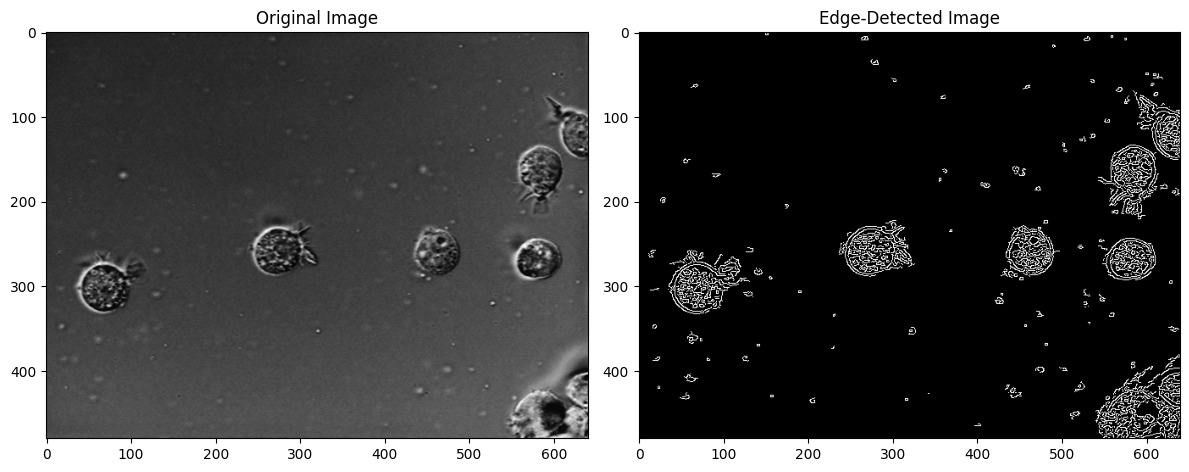

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the TIFF image
image_path = 'cell.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, threshold1=30, threshold2=100)

# Save the edge-detected image
output_path = 'edge_detected_cell_image.png'
cv2.imwrite(output_path, edges)

# Display the original and edge-detected images using Matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Edge-detected image
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected Image')

plt.tight_layout()
plt.show()


In [13]:
import cv2
import numpy as np

# Load the ground truth and detected edges
ground_truth_path = 'cell.tif'  # Replace with the path to your ground truth edge image
detected_path = 'edge_detected_cell_image.png'  # Path to the edge-detected image

# Load the ground truth and detected images
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
detected = cv2.imread(detected_path, cv2.IMREAD_GRAYSCALE)

# Threshold the images to create binary masks
_, ground_truth_mask = cv2.threshold(ground_truth, 128, 255, cv2.THRESH_BINARY)
_, detected_mask = cv2.threshold(detected, 128, 255, cv2.THRESH_BINARY)

# Calculate True Positives, False Positives, and False Negatives
intersection = cv2.bitwise_and(ground_truth_mask, detected_mask)
true_positives = np.count_nonzero(intersection)
false_positives = np.count_nonzero(detected_mask - intersection)
false_negatives = np.count_nonzero(ground_truth_mask - intersection)

# Calculate Precision, Recall, and F1-Score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate Intersection over Union (IoU)
intersection_area = np.count_nonzero(intersection)
union_area = np.count_nonzero(ground_truth_mask) + np.count_nonzero(detected_mask) - intersection_area
iou = intersection_area / union_area

# Display evaluation results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"IoU: {iou:.2f}")


Precision: 0.20
Recall: 0.30
F1-Score: 0.24
IoU: 0.14


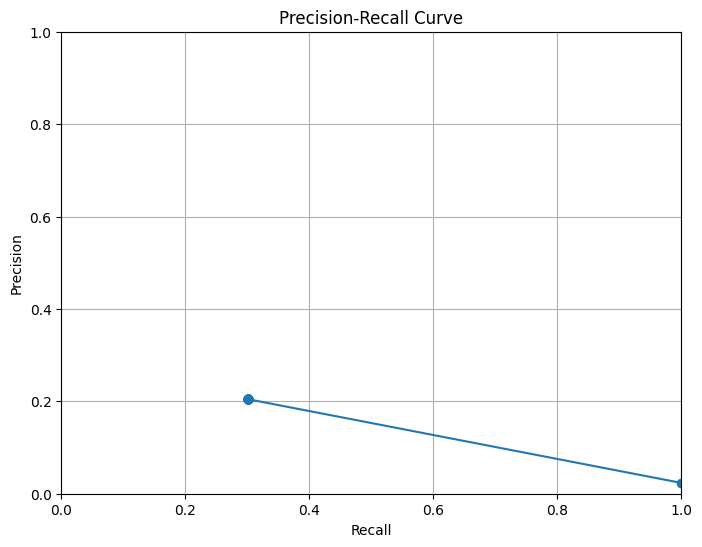

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ground truth and detected edges
ground_truth_path = 'cell.tif'  # Replace with the path to your ground truth edge image
detected_path = 'edge_detected_cell_image.png'  # Path to the edge-detected image

# Load the ground truth and detected images
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
detected = cv2.imread(detected_path, cv2.IMREAD_GRAYSCALE)

# Threshold the images to create binary masks
_, ground_truth_mask = cv2.threshold(ground_truth, 128, 255, cv2.THRESH_BINARY)
_, detected_mask = cv2.threshold(detected, 128, 255, cv2.THRESH_BINARY)

# Calculate True Positives, False Positives, and False Negatives
intersection = cv2.bitwise_and(ground_truth_mask, detected_mask)
true_positives = np.count_nonzero(intersection)
false_positives = np.count_nonzero(detected_mask - intersection)
false_negatives = np.count_nonzero(ground_truth_mask - intersection)

# Calculate Precision and Recall for different threshold values
threshold_values = np.arange(0, 256, 5)  # Adjust the range and step size as needed
precisions = []
recalls = []

for threshold in threshold_values:
    # Create binary masks using the current threshold
    detected_mask_current = (detected >= threshold).astype(np.uint8) * 255

    # Calculate True Positives, False Positives, and False Negatives for the current threshold
    intersection_current = cv2.bitwise_and(ground_truth_mask, detected_mask_current)
    true_positives_current = np.count_nonzero(intersection_current)
    false_positives_current = np.count_nonzero(detected_mask_current - intersection_current)
    false_negatives_current = np.count_nonzero(ground_truth_mask - intersection_current)

    # Calculate Precision and Recall for the current threshold
    precision_current = true_positives_current / (true_positives_current + false_positives_current)
    recall_current = true_positives_current / (true_positives_current + false_negatives_current)

    precisions.append(precision_current)
    recalls.append(recall_current)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


## Line Coordinate Analysis

In this section, we analyze the provided line with coordinates:

- Point A: (0.3, 0.2)
- Point B: (1.0, 0.1)

### Inferences

1. **Line Direction:** The line starts at Point A and ends at Point B. It appears to be slanting downward from left to right since the y-coordinate decreases from 0.2 to 0.1 as the x-coordinate increases from 0.3 to 1.0.

2. **Slope:** The slope of the line is indicating a negative slope.

4. **Directionality:** The line has a downward direction, characterized by its negative slope and movement from higher y-coordinates to lower y-coordinates as x increases.

5. **Position on the Coordinate Plane:** The line is situated in the Cartesian coordinate plane and is defined by its two endpoints, allowing for analysis of its position, slope, and length relative to other objects or features on the plane.

These inferences provide fundamental information about the line's characteristics and its position in the two-dimensional space defined by the given coordinates.


In [ ]:
import cv2
from sklearn.metrics import silhouette_score
import numpy as np

# Load the ground-truth labels (replace 'ground_truth.jpg' with your ground-truth image)
ground_truth_path = 'brain.jpeg'
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

# Load the segmented image (replace 'segmented_image.jpg' with your segmented image)
segmented_image_path = 'edge_detected_image.png'
segmented_image = cv2.imread(segmented_image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the images for silhouette score calculation
ground_truth_flat = ground_truth.flatten()
segmented_image_flat = segmented_image.flatten()

# Calculate silhouette score
silhouette_avg = silhouette_score(segmented_image_flat.reshape(-1, 1), ground_truth_flat)
print(f"Silhouette Score: {silhouette_avg}")
